<a href="https://colab.research.google.com/github/TanyaShamis1710/my_repo1/blob/hometask_4/hometask_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данный отчет раскрывает характер и особенности задержек рейсов в трех аэропортах Нью-Йорка в 2013 году. Будет проанализировано наиболее подверженное задержкам время, а также в большей мере способствующие задержкам погодны условия. Наконец, будут выявлены самые "задерживающиеся" авиакомпании в каждом аэропорту.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
    
df = pd.read_csv(url, sep=',') #won't work!
df.head(20)


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


   Unnamed: 0  year  month  day  ...  hour  minute  gain  dep_delayed_poz
0           1  2013      1    1  ...   5.0    17.0   9.0             True
1           2  2013      1    1  ...   5.0    33.0  16.0             True
2           3  2013      1    1  ...   5.0    42.0  31.0             True
3           4  2013      1    1  ...   5.0    44.0 -17.0            False
4           5  2013      1    1  ...   5.0    54.0 -19.0            False
5           6  2013      1    1  ...   5.0    54.0  16.0            False
6           7  2013      1    1  ...   5.0    55.0  24.0            False
7           8  2013      1    1  ...   5.0    57.0 -11.0            False
8           9  2013      1    1  ...   5.0    57.0  -5.0            False

[9 rows x 19 columns]


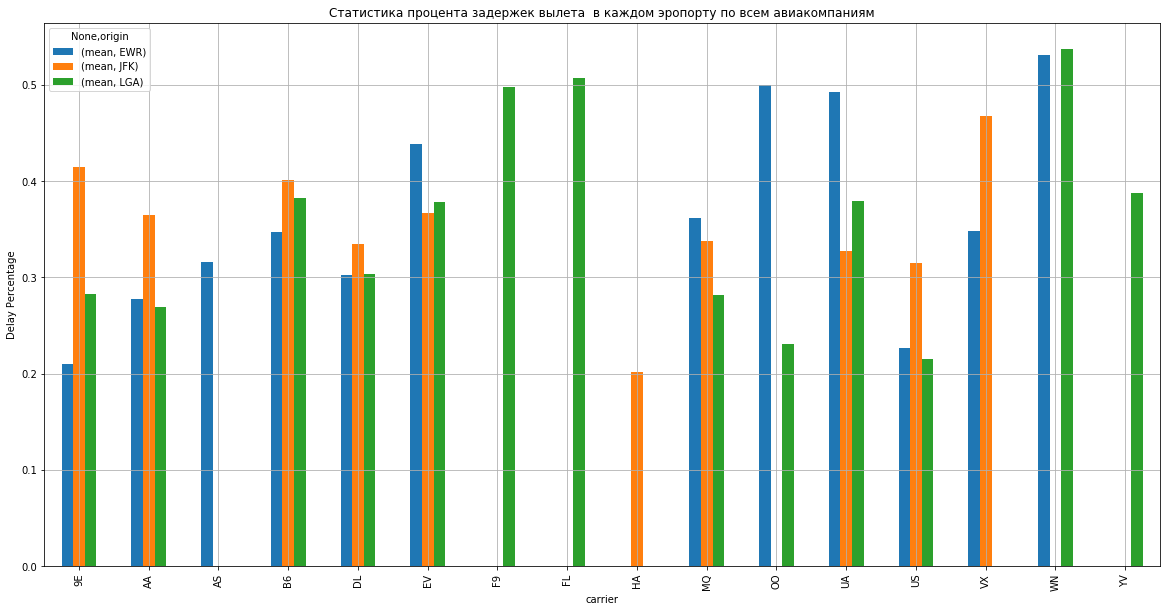

In [5]:
df['gain']=df.arr_delay-df.dep_delay
df['dep_delayed_poz']=0
df['dep_delayed_poz']=df.dep_delay>0
df.dep_delayed_poz*100
print(df.head(9))
df.groupby(['carrier','origin'])['dep_delayed_poz'].agg([np.mean]).unstack(level=1).plot(kind='bar', figsize=(20,10),fontsize=10,grid=True)
plt.ylabel('Delay Percentage')                                                                                

plt.title('Статистика процента задержек вылета  в каждом эропорту по всем авиакомпаниям')
plt.show() # видно что среднее значение задержки вылетов почти в 2 раза больше задержки прибытия



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


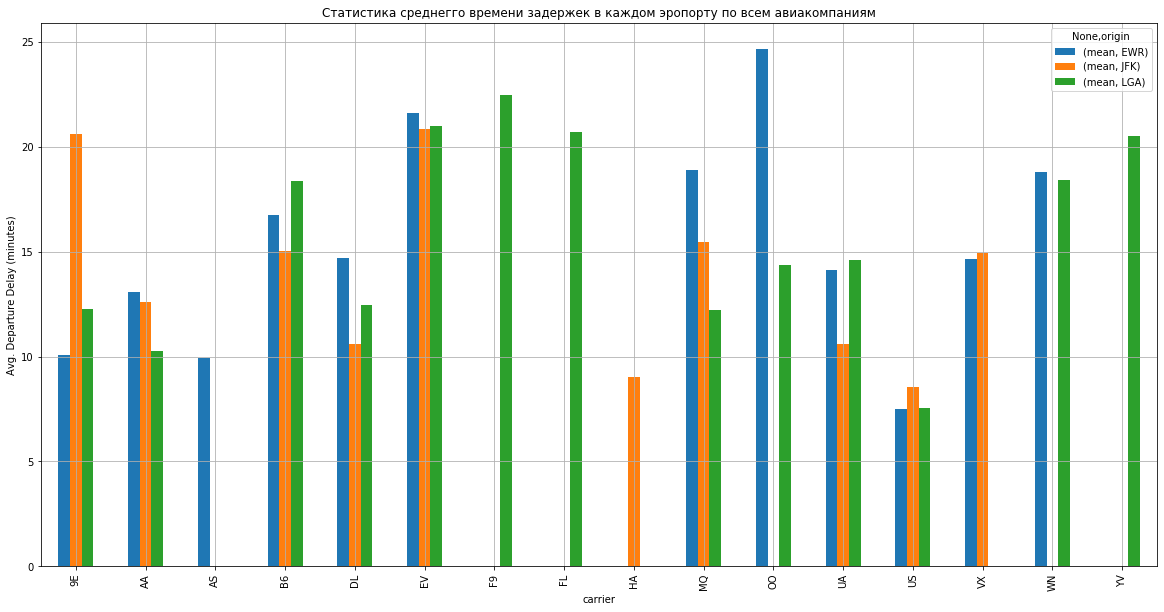

In [0]:
df['dep_delayed']=0;
df.dep_delayed[df.dep_delay>0]=df.dep_delay[df.dep_delay>0]

df.groupby(['carrier','origin'])['dep_delayed'].agg([np.mean]).unstack(level=1).plot(kind='bar', figsize=(20,10),fontsize=10,grid=True)
                                                                                    
plt.ylabel('Avg. Departure Delay (minutes)')

plt.title('Статистика среднегго времени задержек в каждом эропорту по всем авиакомпаниям')
plt.show() # видно что среднее значение задержки вылетов почти в 2 раза больше задержки прибытия


Text(0.5, 1.0, 'Статистика перелетов, совершаемых разными авиакомпаниями в каждом аэропорту')

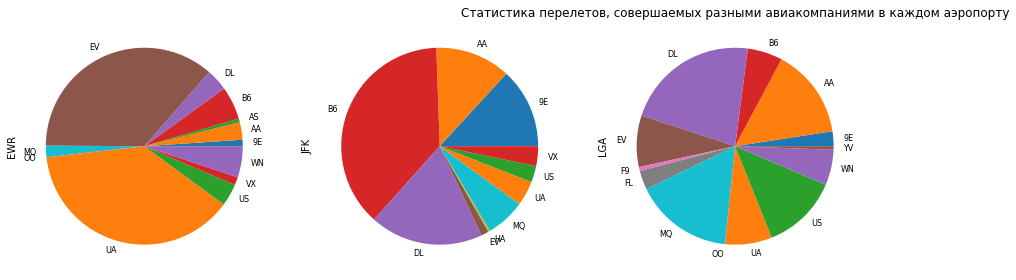

In [0]:
df.groupby(['origin','carrier'])['carrier'].count().unstack(level=0).plot( kind='pie',legend=False,figsize=(15,15),rot=50,subplots=True,fontsize=8)
plt.title('Статистика перелетов, совершаемых разными авиакомпаниями в каждом аэропорту')



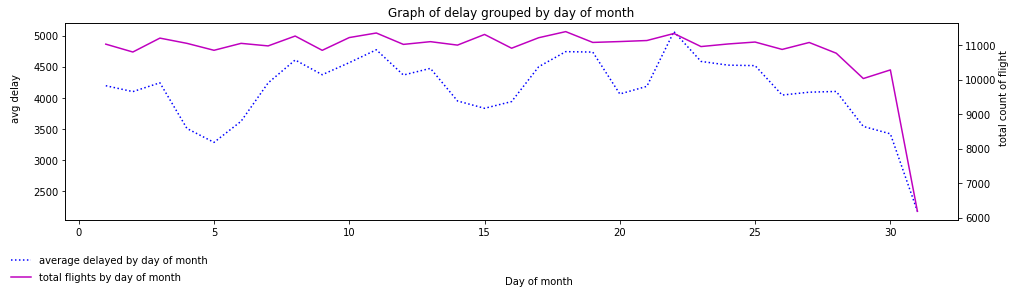

In [0]:


plt.figure(figsize=(16,8))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,32), df.groupby("day").agg({"dep_delayed_poz": np.sum
                                                    }), 'k:', color='b')
line.set_label("average delayed by day of month")
ax0.legend(bbox_to_anchor=(.17, -0.13), frameon = False)

line2, = ax1.plot(range(1,32), list(df["day"].value_counts().sort_index()), color='m')
line2.set_label("total flights by day of month")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(17, 1000,'Day of month', ha='center')
ax0.text(-2.5, 4000, 'avg delay', va='center', rotation='vertical')
ax0.text(34, 4000, 'total count of flight', va='center', rotation='vertical')
plt.title(u"Graph of delay grouped by day of month")
plt.show()


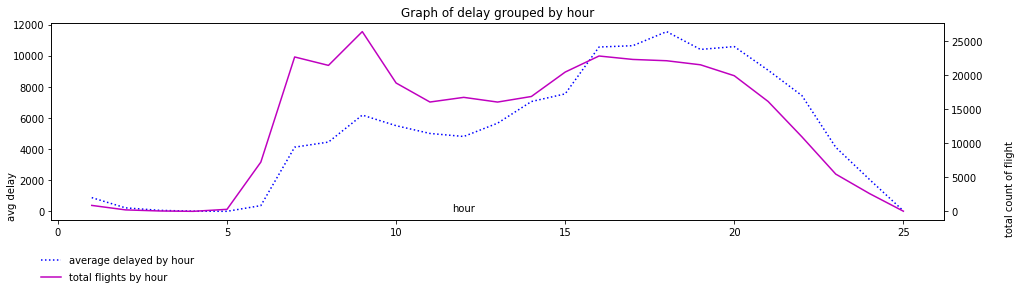

In [0]:
plt.figure(figsize=(16,8))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,26), df.groupby("hour").agg({"dep_delayed_poz": np.sum}), 'k:', color='b')
line.set_label("average delayed by hour")
ax0.legend(bbox_to_anchor=(.17, -0.13), frameon = False)

line2, = ax1.plot(range(1,26), list(df["hour"].value_counts().sort_index()), color='m')
line2.set_label("total flights by hour")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(12, 1, 'hour', ha='center')
ax0.text(-1.5, 1000, 'avg delay', va='center', rotation='vertical')
ax0.text(28, 1500, 'total count of flight', va='center', rotation='vertical')
plt.title(u"Graph of delay grouped by hour")
plt.show()

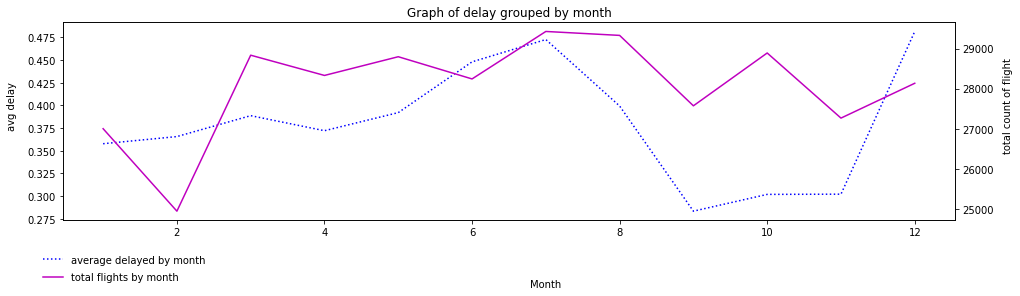

In [0]:
plt.figure(figsize=(16,8))
ax0 = plt.subplot(212)
ax1 = ax0.twinx()
line, = ax0.plot(range(1,13), df.groupby("month").agg({"dep_delayed_poz": np.mean}), 'k:', color='b')
line.set_label("average delayed by month")
ax0.legend(bbox_to_anchor=(.17, -0.13), frameon = False)

line2, = ax1.plot(range(1,13), list(df["month"].value_counts().sort_index()), color='m')
line2.set_label("total flights by month")
ax1.legend(bbox_to_anchor=(.14, -0.22), frameon = False)

ax0.text(7, 0.2, 'Month', ha='center')
ax0.text(-0.3, 0.4, 'avg delay', va='center', rotation='vertical')
ax0.text(13.2, 0.4, 'total count of flight', va='center', rotation='vertical')
plt.title(u"Graph of delay grouped by month")
plt.show()

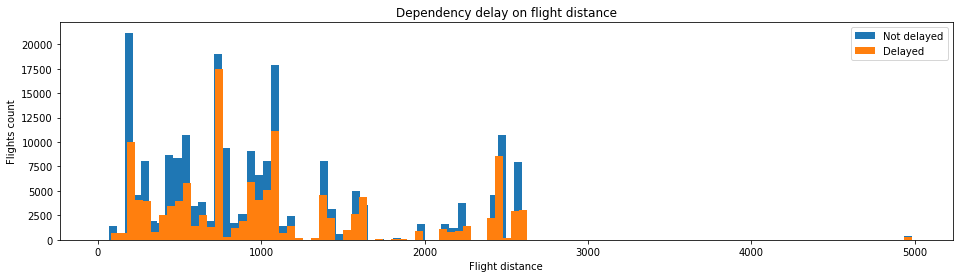

In [9]:

plt.figure(figsize=(16,4))
df['distance'][df['dep_delayed_poz'] == 0].plot(kind='hist', bins=100, label="Not delayed")
df['distance'][df['dep_delayed_poz'] == 1].plot(kind='hist', bins=100, label="Delayed")
plt.title(u"Dependency delay on flight distance")
plt.xlabel(u"Flight distance")
plt.ylabel(u"Flights count")
plt.legend()
#plt.xticks(np.arange(0,1000,100))
plt.show()

In [11]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
df_weather = pd.read_csv(url, sep=',') #won't work!
df_weather.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


Index(['origin', 'month', 'day', 'hour', 'Count', 'TotalDelay', 'Unnamed: 0',
       'year', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')
  origin  month  day  hour  ...  wind_gust  precip  pressure  visib
0    EWR      1    1   6.0  ...  11.918651     0.0    1012.0   10.0
1    EWR      1    1   7.0  ...   9.270062     0.0    1012.3   10.0
2    EWR      1    1   8.0  ...  13.242946     0.0    1012.5   10.0
3    EWR      1    1   9.0  ...  14.567241     0.0    1012.2   10.0
4    EWR      1    1  10.0  ...  14.567241     0.0    1011.9   10.0
5    EWR      1    1  11.0  ...  13.242946     0.0    1012.4   10.0
6    EWR      1    1  12.0  ...  17.215830     0.0    1012.2   10.0
7    EWR      1    1  13.0  ...  11.918651     0.0    1012.2   10.0
8    EWR      1    1  14.0  ...  17.215830     0.0    1012.7   10.0
9    EWR      1    1  15.0  ...  15.891535     0.0    1012.4   10.0

[10 rows x 17 columns]
   precip 

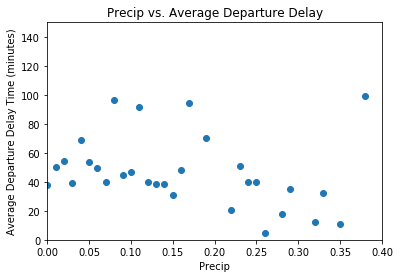

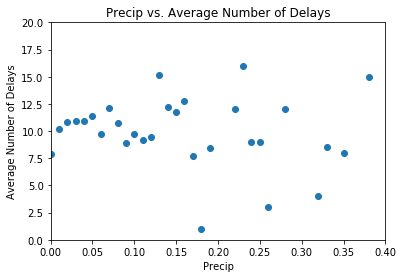

In [13]:
#df['arr_delayed']=0;
#df.arr_delayed[df.arr_delay>0]=df.arr_delay[df.arr_delay>0]
df_filtered_delayed = df[df.dep_delay>0] 

#Grouping by origin, hour, day and month, as analysis would be at the granularity of the weather dataset
groupby_output = df_filtered_delayed.groupby([df_filtered_delayed.origin, df_filtered_delayed.month, df_filtered_delayed.day, df_filtered_delayed.hour])
df_grouped = groupby_output['dep_delay'].agg([np.size, np.mean]).reset_index()
df_merged = pd.merge(df_grouped , df_weather, on=['origin','hour','day','month'])
df_merged = df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
print(df_merged.columns)
print(df_merged.head(10))

by_precip = df_merged.groupby([df_merged.precip])['TotalDelay', 'Count'].agg([np.mean]).reset_index()
print(by_precip)

#plot the data
plt.scatter(by_precip.precip, by_precip.TotalDelay)
plt.xlim(0, 0.4)
plt.ylim(0, 150)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Precip')
plt.title('Precip vs. Average Departure Delay')
plt.show()

#plot the data
plt.scatter(by_precip.precip, by_precip.Count)
plt.xlim(0, 0.4)
plt.ylim(0, 20)
plt.ylabel('Average Number of Delays')
plt.xlabel('Precip')
plt.title('Precip vs. Average Number of Delays')
plt.show()




#df_merged.groupby('precip')['dep_delayed', 'precip'].agg([np.mean]).plot(kind='scatter',x='precip',y='dep_delayed')
#plt.ylabel('Average departure delayed (minute)')
#plt.title('Dependence average departure time delayed by precip')
#plt.xlim(0,0.5)
#plt.ylim(0,120)
#plt.show()
#df_merged.groupby('precip')['dep_delayed_poz','precip'].agg([np.mean]).plot(kind='scatter',x='precip',y='dep_delayed_poz')
#plt.ylabel('Average number of departure delays')
#plt.title('Dependence average number of departure delays by precip')
#plt.xlim(0,0.5)
#plt.show()

   precip  TotalDelay      Count
                 mean       mean
0    0.00   37.831159   7.876280
1    0.01   50.225159  10.149123
2    0.02   54.374620  10.837838
3    0.03   39.508620  10.906977
4    0.04   68.867176  10.960000
5    0.05   53.860674  11.409091
6    0.06   49.590391   9.736842
7    0.07   39.614199  12.083333
8    0.08   96.155163  10.777778
9    0.09   44.625427   8.923077
10   0.10   46.664502   9.714286
11   0.11   91.267366   9.200000
12   0.12   39.655462   9.500000
13   0.13   38.672340  15.166667
14   0.14   38.395388  12.250000
15   0.15   30.660539  11.750000
16   0.16   47.965368  12.800000
17   0.17   94.438889   7.666667
18   0.18  312.000000   1.000000
19   0.19   70.568571   8.400000
20   0.22   20.333333  12.000000
21   0.23   50.937500  16.000000
22   0.24   39.666667   9.000000
23   0.25   39.666667   9.000000
24   0.26    4.666667   3.000000
25   0.28   18.083333  12.000000
26   0.29   35.285714  21.000000
27   0.32   12.250000   4.000000
28   0.33 

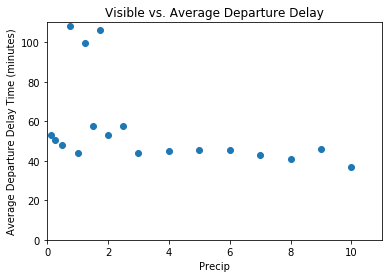

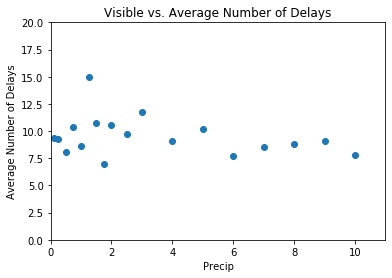

In [17]:

by_visib = df_merged.groupby([df_merged.visib])['TotalDelay', 'Count'].agg([np.mean]).reset_index()
print(by_precip)

#plot the data
plt.scatter(by_visib.visib, by_visib.TotalDelay)
plt.xlim(0, 11)
plt.ylim(0, 110)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Precip')
plt.title('Visible vs. Average Departure Delay')
plt.show()

#plot the data
plt.scatter(by_visib.visib, by_visib.Count)
plt.xlim(0, 11)
plt.ylim(0, 20)
plt.ylabel('Average Number of Delays')
plt.xlabel('Precip')
plt.title('Visible vs. Average Number of Delays')
plt.show()




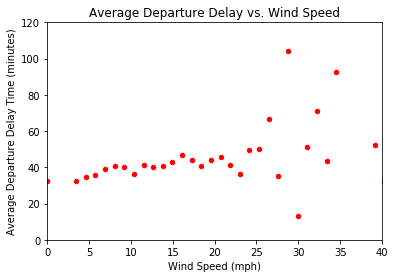

In [0]:
df_wind_analysis = df_merged.dropna(subset = ['wind_speed'])
df_merged.groupby([df_wind_analysis.wind_speed])['TotalDelay','wind_speed'].agg([np.mean]).plot(kind='scatter',x='wind_speed',y='TotalDelay', color='red')
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Wind Speed (mph)')
plt.title('Average Departure Delay vs. Wind Speed')
plt.show()
#df_merged.groupby([df_wind_analysis.wind_speed])['arr_delayed','wind_speed'].agg([np.mean]).plot(kind='scatter',x='wind_speed',y='arr_delayed',color='green')
#plt.xlim(0, 40)
#plt.ylim(0, 120)
#plt.ylabel('Average arrival Delay Time (minutes)')
#plt.xlabel('Wind Speed (mph)')
#plt.title('Average arrival Delay vs. Wind Speed')
#plt.show()

В аэропорту LGA авиакомпании WN,F9,FL имеют наиболее большой процент задержек, в то время как имеют сравнительно маленькое количество рейсов в данном аэропорту. Аналогичная ситуация с VX в JFK, и OO,WN в EWR. Наиболее подверженные задержкам вылета дни месяца: 23-25 (задержена почти половина всех рейсов в эти дни), наименее - 3-6 (задержено менее 1/3 всех рейсов). Начиная с 16:00 часов задерживается больше половины всех рейсов. В 5-7 меясяцы задерживается при вылете почти половина всех рейсов, в то время как эти месяцы имеют наибольшее количество рейсов по сравнению с другими. При полетах на дистанцию 700-800 км. почти все рейсы задерживаются на вылете.При среднем количестве осадков 0.05-0.25 имеется наибольшее количесвто задержек и и среднее время задержек вылета. Чем меньше видимость, тем больше среднее количество задержек и их среднее время. Наконец, из последнего графика видно, что чем больше скорость ветра, тем больше среднее время задержки вылета. Вышеперечисленные выводы способствуют предположению возможных причин задержек рейсов.